# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


In [3]:
pprint(cities)

['ushuaia',
 'punta arenas',
 'cape town',
 'hobart',
 'illoqqortoormiut',
 'fort-shevchenko',
 'bredasdorp',
 'atuona',
 'taolanaro',
 'busselton',
 'clearwater',
 'bluff',
 'chapais',
 'leningradskiy',
 'upernavik',
 'half moon bay',
 'hilo',
 'pevek',
 'rikitea',
 'seddon',
 'shimoda',
 'russell',
 'ahuimanu',
 'los llanos de aridane',
 'bindura',
 'kapaa',
 'cafelandia',
 'saint-philippe',
 'barrow',
 'isangel',
 'nizhneyansk',
 'vaini',
 'itapeva',
 'carnarvon',
 'narsaq',
 'lompoc',
 'ambilobe',
 'lolua',
 'hermanus',
 'chichihualco',
 'arraial do cabo',
 'koumac',
 'ilulissat',
 'new norfolk',
 'avera',
 'kuche',
 'dwarka',
 'yulara',
 'otukpo',
 'thinadhoo',
 'lorengau',
 'kaitangata',
 'karamay',
 'chuy',
 'batagay',
 'port macquarie',
 'aban',
 'port elizabeth',
 'beringovskiy',
 'ankazoabo',
 'sao filipe',
 'rosarito',
 'bolungarvik',
 'amderma',
 'thayetmyo',
 'skibbereen',
 'hasaki',
 'clyde river',
 'ponta do sol',
 'hay river',
 'ponta delgada',
 'faanui',
 'sinnamary',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | fort-shevchenko
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | clearwater
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | chapais
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | seddon
Processing Record 21 of Set 1 | shimoda
Processing Reco

Processing Record 38 of Set 4 | san quintin
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | mgandu
Processing Record 44 of Set 4 | dudinka
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 0 of Set 5 | dharmadam
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | pangody
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | porto santo
Processing Record 8 of Set 5 | kangaba
Processing Record

Processing Record 30 of Set 8 | gizo
Processing Record 31 of Set 8 | cullera
Processing Record 32 of Set 8 | zhanakorgan
Processing Record 33 of Set 8 | bozeman
Processing Record 34 of Set 8 | tampere
Processing Record 35 of Set 8 | yima
Processing Record 36 of Set 8 | fare
Processing Record 37 of Set 8 | lahij
Processing Record 38 of Set 8 | brodokalmak
Processing Record 39 of Set 8 | ascension
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | ribeira grande
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | akdepe
Processing Record 44 of Set 8 | honningsvag
Processing Record 45 of Set 8 | okhotsk
Processing Record 46 of Set 8 | bar harbor
Processing Record 47 of Set 8 | galgani
City not found. Skipping...
Processing Record 48 of Set 8 | havre-saint-pierre
Processing Record 49 of Set 8 | taybad
Processing Record 0 of Set 9 | la ceiba
Processing Record 1 of Set 9 | jagdalpur
Processing Record 2 of Set 9 | makhinjauri
Processing Record 3 of 

Processing Record 16 of Set 12 | sao gabriel da cachoeira
Processing Record 17 of Set 12 | gimli
Processing Record 18 of Set 12 | stromness
Processing Record 19 of Set 12 | salamanca
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | cocorit
Processing Record 23 of Set 12 | brawley
Processing Record 24 of Set 12 | havoysund
Processing Record 25 of Set 12 | darnah
Processing Record 26 of Set 12 | nara
Processing Record 27 of Set 12 | iwase
Processing Record 28 of Set 12 | evensk
Processing Record 29 of Set 12 | himora
City not found. Skipping...
Processing Record 30 of Set 12 | nemuro
Processing Record 31 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 32 of Set 12 | gamba
Processing Record 33 of Set 12 | nambucca heads
Processing Record 34 of Set 12 | lobva
Processing Record 35 of Set 12 | novogurovskiy
Processing Record 36 of Set 12 | brae
-----------------------------
Data Retrieval Complete  

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,54.81,58,82,2.68,AR,1675808811
1,punta arenas,-53.1500,-70.9167,60.91,59,75,14.97,CL,1675808977
2,cape town,-33.9258,18.4232,71.38,75,30,11.99,ZA,1675808953
3,hobart,-42.8794,147.3294,58.86,65,75,10.36,AU,1675808978
4,fort-shevchenko,44.5086,50.2630,38.07,83,100,24.38,KZ,1675808980


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,54.81,58,82,2.68,AR,1675808811
1,punta arenas,-53.1500,-70.9167,60.91,59,75,14.97,CL,1675808977
2,cape town,-33.9258,18.4232,71.38,75,30,11.99,ZA,1675808953
3,hobart,-42.8794,147.3294,58.86,65,75,10.36,AU,1675808978
4,fort-shevchenko,44.5086,50.2630,38.07,83,100,24.38,KZ,1675808980


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

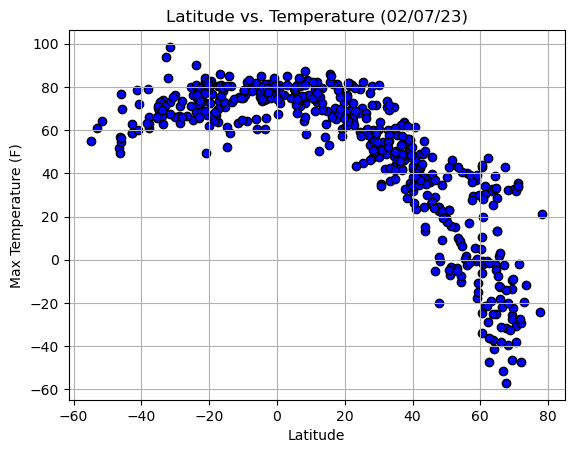

In [11]:
lat=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat,temp,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

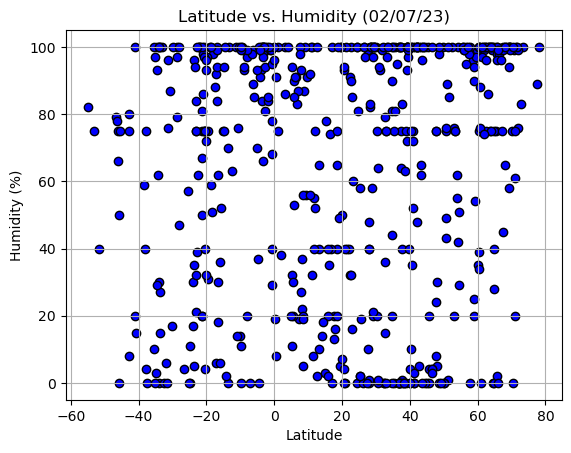

In [12]:
lat2=city_data_df["Lat"]
humid=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat2,humid,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

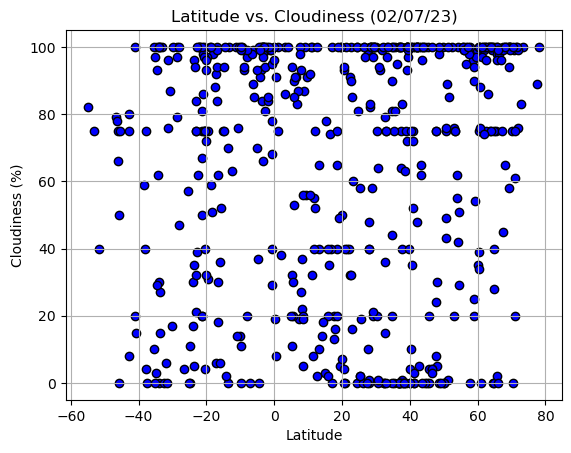

In [13]:
lat3=city_data_df["Lat"]
cloud=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat3,cloud,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

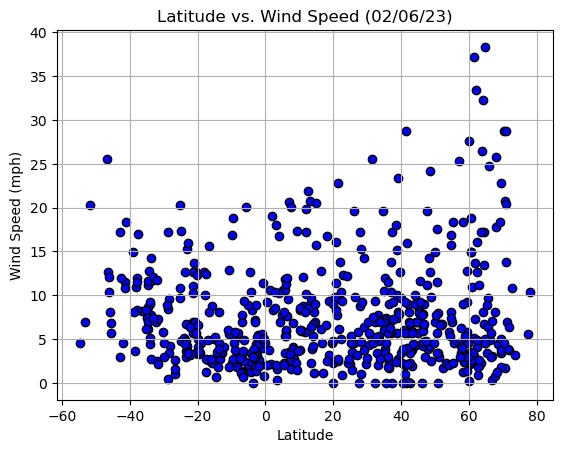

In [23]:
lat4=city_data_df["Lat"]
wind=city_data_df["Wind Speed"]
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat4,wind,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, text_coordinates):     
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,fort-shevchenko,44.5086,50.2630,38.07,83,100,24.38,KZ,1675808980
8,clearwater,27.9659,-82.8001,80.58,53,0,5.99,US,1675808752
10,chapais,49.7834,-74.8492,19.18,95,100,12.77,CA,1675808724
11,leningradskiy,69.3833,178.4167,-25.37,96,100,5.59,RU,1675808985
12,upernavik,72.7868,-56.1549,-19.37,97,83,2.98,GL,1675808986


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,54.81,58,82,2.68,AR,1675808811
1,punta arenas,-53.1500,-70.9167,60.91,59,75,14.97,CL,1675808977
2,cape town,-33.9258,18.4232,71.38,75,30,11.99,ZA,1675808953
3,hobart,-42.8794,147.3294,58.86,65,75,10.36,AU,1675808978
5,bredasdorp,-34.5322,20.0403,67.35,74,93,9.46,ZA,1675808980


###  Temperature vs. Latitude Linear Regression Plot

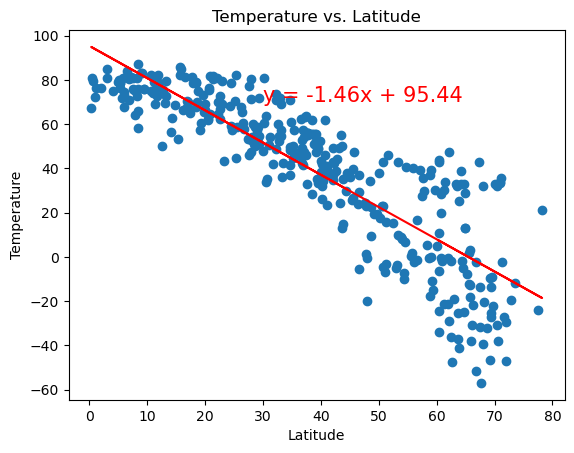

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(30,70))

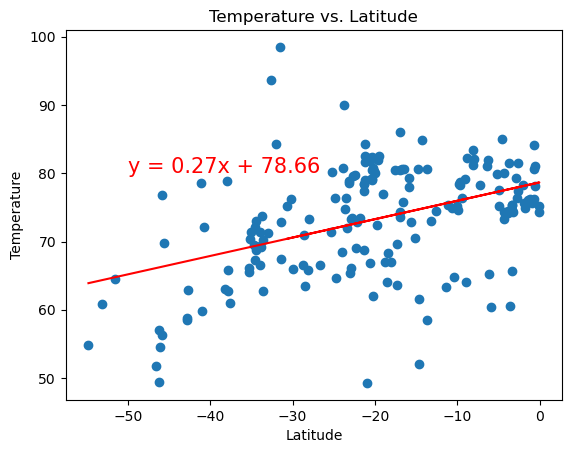

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,80))

**Discussion about the linear relationship:** Both Graphs show that as you get closer to zero which is the equator the average temperature rises. This corresponds with what we are taught to believe that the equator is going to be the hottest area on earth because it is closest to the sun since the earth is sperical and the equator is the middle point of the earth.

### Humidity vs. Latitude Linear Regression Plot

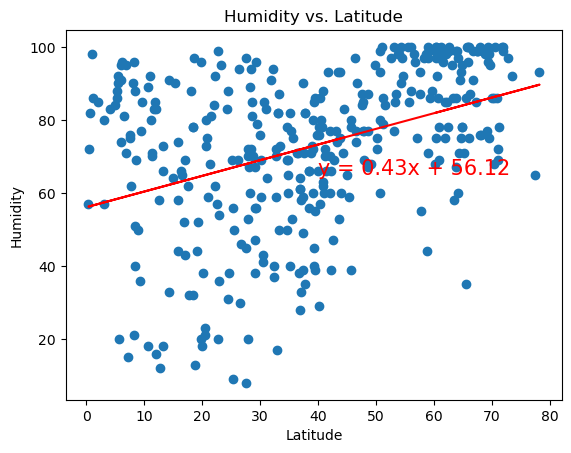

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,65))

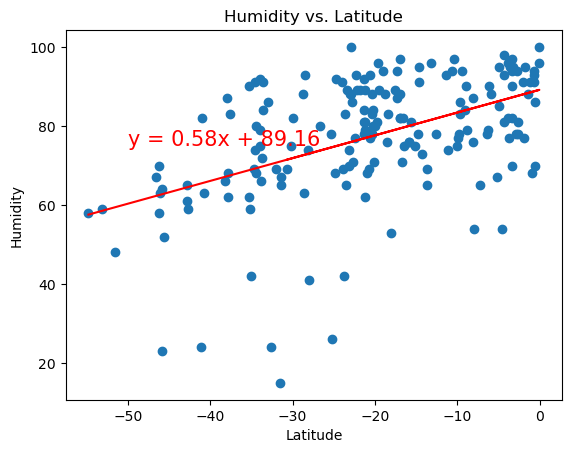

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,75))

**Discussion about the linear relationship:** As we get closer to the equator we see that the humidity rises. This may correlate with the fact that the temperature is higher in these areas on average (as seen earlier) which will cause more water vapor to be in the air as it evaoparates. The increase in water vapor means that it is more humid.

### Cloudiness vs. Latitude Linear Regression Plot

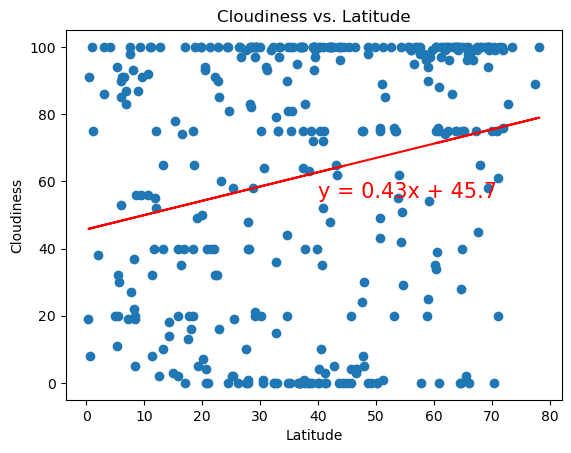

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,55))

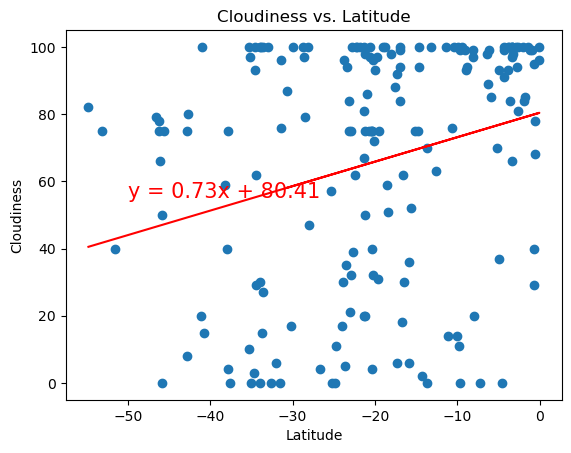

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,55))

**Discussion about the linear relationship:** Once again our graphs show as we get closer to the equator we see an increase in cloudiness. Clouds are caused by water vapor being in the air and forming so it makes sense that as we are in hotter and more humid areas there are more clouds being formed.

### Wind Speed vs. Latitude Linear Regression Plot

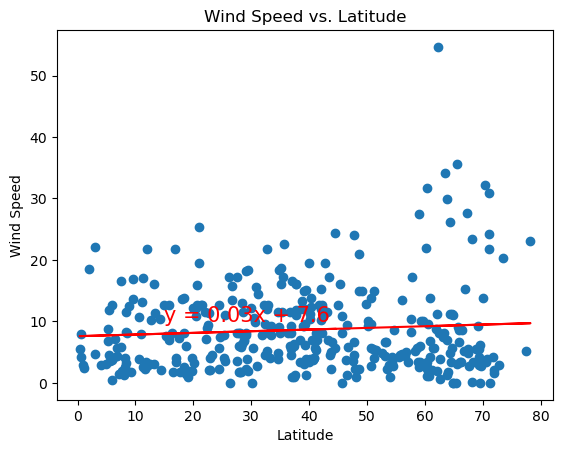

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(15,10))

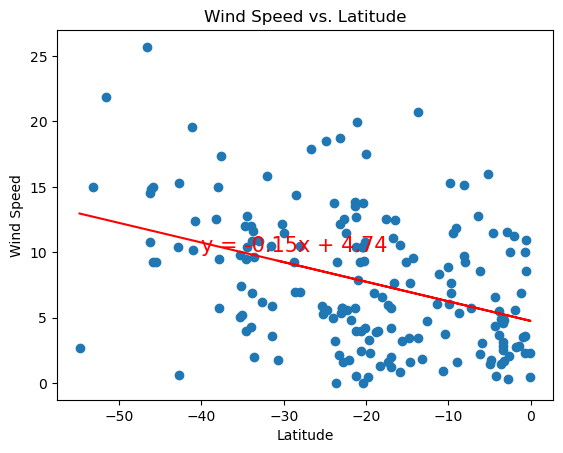

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(-40,10))

**Discussion about the linear relationship:** Wind Speed in northern hemisphere has almost no slope. Seems that it does not matter where you are the wind speed will be about the same regardless. In the southern hemisphere it has a slightly more pronounced slope showing that as you mover further and further south of the equator the average wind speed will pick up.